# MNIST 手写数字分类器

In [9]:
import tensorflow as tf
(X_train_image, y_train_lable), (X_test_image, y_test_lable) = tf.keras.datasets.mnist.load_data()

In [10]:
from tensorflow.keras.utils import to_categorical # 导入keras.utils工具箱的类别转换工具
X_train = X_train_image.reshape(60000,28,28,1) # 给标签增加一个维度
X_test = X_test_image.reshape(10000,28,28,1) # 给标签增加一个维度
y_train = to_categorical(y_train_lable, 10) # 特征转换为one-hot编码
y_test = to_categorical(y_test_lable, 10) # 特征转换为one-hot编码
print ("数据集张量形状：", X_train.shape) # 特征集张量的形状
print ("第一个数据标签：",y_train[0]) # 显示标签集的第一个数据

数据集张量形状： (60000, 28, 28, 1)
第一个数据标签： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
from keras import models # 导入Keras模型, 和各种神经网络的层
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = models.Sequential() # 用序贯方式建立模型
model.add(Conv2D(32, (3, 3), activation='relu', # 添加Conv2D层
                 input_shape=(28,28,1))) # 指定输入数据样本张量的类型
model.add(MaxPooling2D(pool_size=(2, 2))) # 添加MaxPooling2D层
model.add(Conv2D(64, (3, 3), activation='relu')) # 添加Conv2D层
model.add(MaxPooling2D(pool_size=(2, 2))) # 添加MaxPooling2D层
model.add(Dropout(0.25)) # 添加Dropout层
model.add(Flatten()) # 展平
model.add(Dense(128, activation='relu')) # 添加全连接层
model.add(Dropout(0.5)) # 添加Dropout层
model.add(Dense(10, activation='softmax')) # Softmax分类激活，输出10维分类码
# 编译模型
model.compile(optimizer='rmsprop', # 指定优化器
              loss='categorical_crossentropy', # 指定损失函数
              metrics=['accuracy']) # 指定验证过程中的评估指标

In [5]:
model.fit(X_train, y_train, # 指定训练特征集和训练标签集
          validation_split = 0.3, # 部分训练集数据拆分成验证集
          epochs=5, # 训练轮次为5轮
          batch_size=128) # 以128为批量进行训练

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.6089 - loss: 5.6990 - val_accuracy: 0.9711 - val_loss: 0.0991
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.9370 - loss: 0.2245 - val_accuracy: 0.9763 - val_loss: 0.0851
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 39s 117ms/step - accuracy: 0.9586 - loss: 0.1487 - val_accuracy: 0.9782 - val_loss: 0.0817
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 44s 133ms/step - accuracy: 0.9688 - loss: 0.1132 - val_accuracy: 0.9829 - val_loss: 0.0592
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 43s 130ms/step - accuracy: 0.9730 - loss: 0.0975 - val_accuracy: 0.9811 - val_loss: 0.0763


In [6]:
score = model.evaluate(X_test, y_test) # 在测试集上进行模型评估
print('测试集预测准确率:', score[1]) # 打印测试集上的预测准确率

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9812 - loss: 0.0741
测试集预测准确率: 0.984000027179718


In [7]:
# 保存模型
model.save('model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[9.16311772e-16 1.01353528e-12 4.15793888e-09 1.77867596e-10
 2.27735419e-13 1.99367376e-16 1.62248828e-19 1.00000000e+00
 6.51910310e-15 1.12738395e-11] 转换一下格式得到： 7


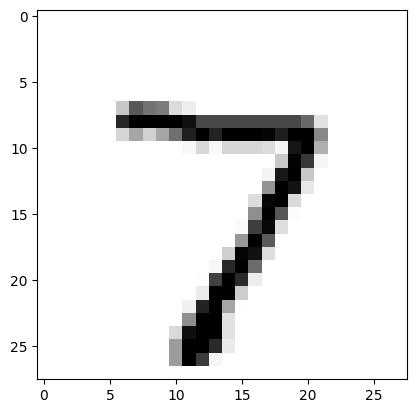

In [8]:
pred = model.predict(X_test[0].reshape(1, 28, 28, 1)) # 预测测试集第一个数据
print(pred[0],"转换一下格式得到：",pred.argmax()) # 把one-hot码转换为数字
import matplotlib.pyplot as plt # 导入绘图工具包
plt.imshow(X_test[0].reshape(28, 28),cmap='Greys') # 输出这个图片